In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression


In [11]:
data = pd.read_csv("Steel_industry_data.csv", dayfirst=True)
data.dtypes

,0
date,object
Usage_kWh,float64
Lagging_Current_Reactive.Power_kVarh,float64
Leading_Current_Reactive_Power_kVarh,float64
CO2(tCO2),float64
Lagging_Current_Power_Factor,float64
Leading_Current_Power_Factor,float64
NSM,int64
WeekStatus,object
Day_of_week,object


In [12]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [13]:
average_usage = data['Usage_kWh'].mean()
min_usage = data['Usage_kWh'].min()
max_usage = data['Usage_kWh'].max()

print("Energy Consumption:")
print(f"Average: {average_usage:.2f} kWh")
print(f"Minimum: {min_usage:.2f} kWh")
print(f"Maximum: {max_usage:.2f} kWh")
print()

Energy Consumption:
Average: 27.39 kWh
Minimum: 0.00 kWh
Maximum: 157.18 kWh



In [14]:
data['day'] = pd.to_datetime(data['date'], dayfirst=True).dt.day
data['month'] = pd.to_datetime(data['date'], dayfirst=True).dt.month
data['year'] = pd.to_datetime(data['date'], dayfirst=True).dt.year
data['time'] = pd.to_datetime(data['date'], dayfirst=True).dt.time
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,time
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1,1,2018,00:15:00
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1,1,2018,00:30:00
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1,1,2018,00:45:00
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1,1,2018,01:00:00
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1,1,2018,01:15:00


In [15]:
weekly_average_usage_data = data.groupby(pd.Grouper(key="WeekStatus"))[data.select_dtypes(include=np.number).columns].mean()
weekly_average_usage_data.head()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,year
WeekStatus,,,,,,,,,,
Weekday,33.624727,16.327770,2.650422,0.014486,79.932112,90.417555,42750.0,15.773946,6.498084,2018.0
Weekend,11.732327,4.772759,6.934001,0.004093,82.199129,69.185488,42750.0,15.586538,6.596154,2018.0


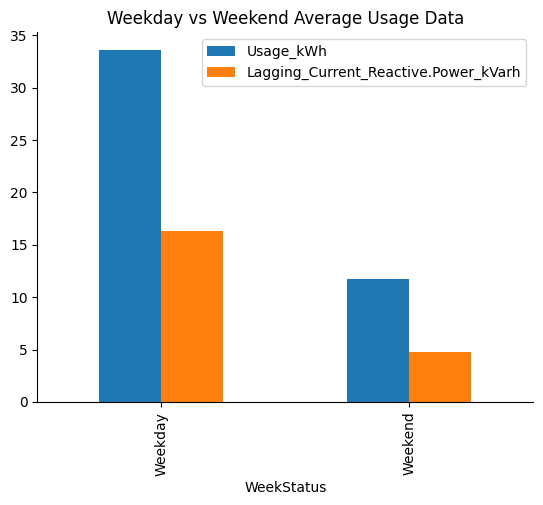

In [16]:
plot=weekly_average_usage_data.plot(y=["Usage_kWh","Lagging_Current_Reactive.Power_kVarh"], kind="bar",title="Weekday vs Weekend Average Usage Data")
plot.spines[['top', 'right']].set_visible(False)

This graph illustrates that the average usage on weekdays is higher compared to the weekend, indicating a significant difference in energy consumption between the two.

In [17]:
daily_average_usage_data = data.groupby(pd.Grouper(key="Day_of_week"))[data.select_dtypes(include=np.number).columns].mean()
daily_average_usage_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,day,month,year
Day_of_week,,,,,,,,,,
Monday,33.143935,16.106470,2.541812,0.014324,79.618194,90.648001,42750.0,15.641509,6.528302,2018.0
Tuesday,34.427614,16.610397,2.509335,0.014587,80.080509,90.841769,42750.0,15.769231,6.442308,2018.0
Wednesday,32.254235,15.465583,3.216741,0.013886,80.557556,87.951955,42750.0,16.173077,6.461538,2018.0
Thursday,35.112083,17.356707,2.367344,0.015294,79.561917,91.823678,42750.0,15.442308,6.519231,2018.0
Friday,33.195014,16.103950,2.618966,0.014339,79.848419,90.817939,42750.0,15.846154,6.538462,2018.0


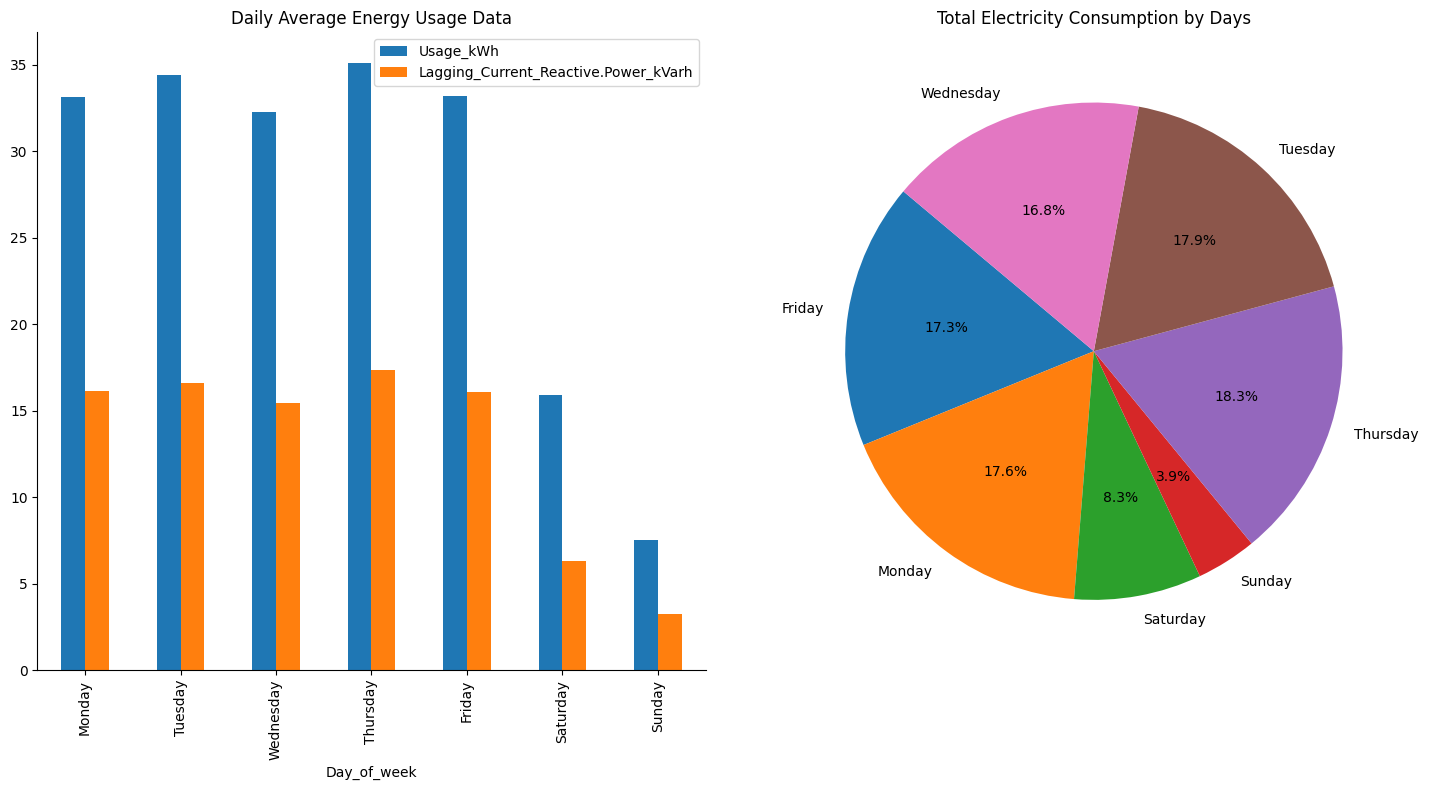

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

daily_average_usage_data.plot(y=["Usage_kWh", "Lagging_Current_Reactive.Power_kVarh"], kind="bar", ax=axes[0], title="Daily Average Energy Usage Data")
axes[0].spines[['top', 'right']].set_visible(False)

total_usage_per_load_type = data.groupby('Day_of_week')['Usage_kWh'].sum()
axes[1].pie(total_usage_per_load_type, labels=total_usage_per_load_type.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Total Electricity Consumption by Days')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


This graph shows that the steel industry energy consumption is noticeably higher on weekdays and lower on weekends. The highest energy consumption occurs on Thursday, while the lowest is observed on Sunday. This pattern is consistent for both the overall industry energy consumption and the Lagging Current reactive power, indicating that energy demand and power usage are significantly impacted by the day of the week. The trend suggests that weekdays, especially Thursday, see higher operational activity and energy requirements, while weekends, particularly Sundays, experience a reduction in energy consumption.

In [19]:
pd.pivot_table(data, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'],
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

<ipython-input-19-824a1c9d7e3b>:1: FutureWarning: The provided callable <function mean at 0x79f2901015a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'],
<ipython-input-19-824a1c9d7e3b>:1: FutureWarning: The provided callable <function mean at 0x79f2901015a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'],


NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

This pivot table provides the average values of NSM (presumably a measure of energy consumption or another metric) and Usage_kWh (electricity usage in kilowatt-hours) based on Load_Type (Light_Load, Maximum_Load, Medium_Load), Day_of_week (Monday to Sunday), and WeekStatus (Weekday or Weekend).

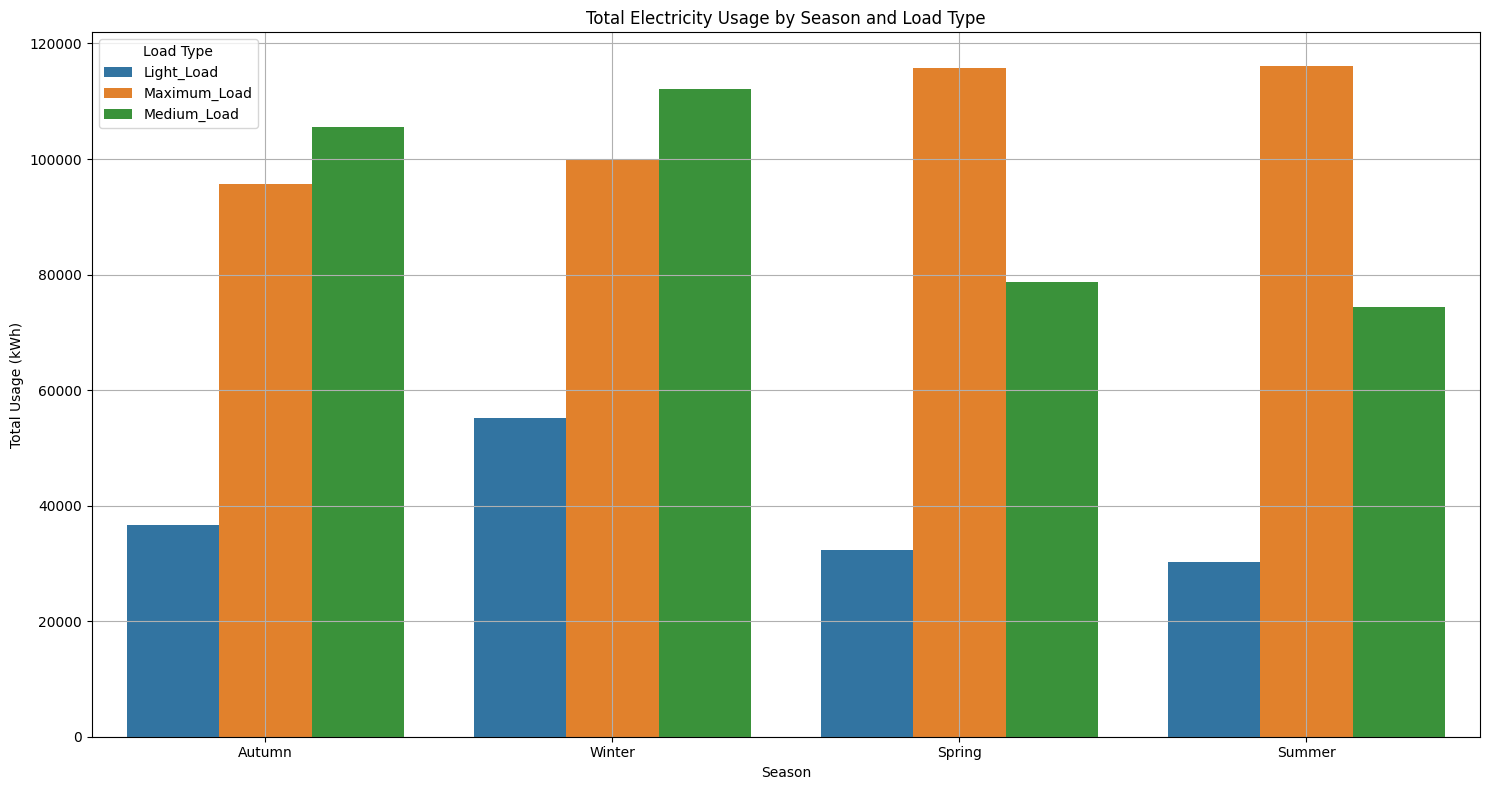

In [20]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M', errors='coerce')
winter_data = data[(data['date'] >= '2018-01-01') & (data['date'] <= '2018-03-20')]
spring_data = data[(data['date'] >= '2018-03-21') & (data['date'] <= '2018-06-20')]
summer_data = data[(data['date'] >= '2018-06-21') & (data['date'] <= '2018-09-22')]
autumn_data = data[(data['date'] >= '2018-09-23') & (data['date'] <= '2018-12-31')]

autumn_total = autumn_data.groupby('Load_Type')['Usage_kWh'].sum().reset_index()
winter_total = winter_data.groupby('Load_Type')['Usage_kWh'].sum().reset_index()
spring_total = spring_data.groupby('Load_Type')['Usage_kWh'].sum().reset_index()
summer_total = summer_data.groupby('Load_Type')['Usage_kWh'].sum().reset_index()


autumn_total['Season'] = 'Autumn'
winter_total['Season'] = 'Winter'
spring_total['Season'] = 'Spring'
summer_total['Season'] = 'Summer'

total_data = pd.concat([autumn_total, winter_total, spring_total, summer_total])
plt.figure(figsize=(15, 8))
sns.barplot(data=total_data, x='Season', y='Usage_kWh', hue='Load_Type', errorbar=None)

plt.title('Total Electricity Usage by Season and Load Type')
plt.xlabel('Season')
plt.ylabel('Total Usage (kWh)')
plt.legend(title='Load Type')
plt.grid(True)
plt.tight_layout()
plt.show()


This analysis visualizes the total electricity usage by season and load type. The dataset is divided into four seasons: Winter, Spring, Summer, and Autumn, based on the date range provided. For each season, the electricity usage (Usage_kWh) is grouped by Load_Type (Light_Load, Medium_Load, and Maximum_Load). For Maximum Load, the highest electricity consumption is seen during the Summer season. Medium Load reaches its peak in Winter, while Light Load also experiences its highest consumption in Winter.

In [21]:
print(data.isna())

        date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      False      False                                 False   
1      False      False                                 False   
2      False      False                                 False   
3      False      False                                 False   
4      False      False                                 False   
...      ...        ...                                   ...   
35035  False      False                                 False   
35036  False      False                                 False   
35037  False      False                                 False   
35038  False      False                                 False   
35039  False      False                                 False   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                     False      False   
1                                     False      False   
2                                     False  

<Axes: >

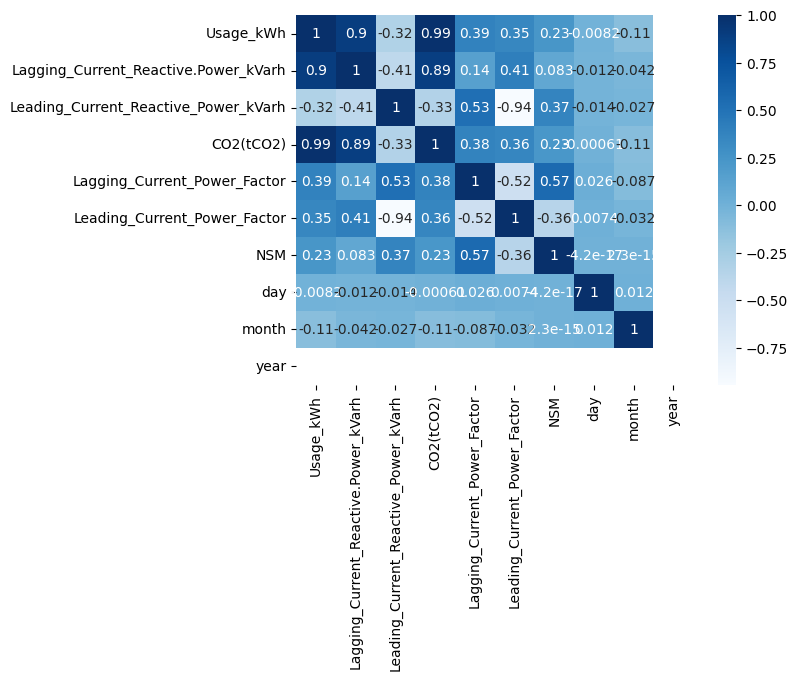

In [22]:
sns.heatmap(data.select_dtypes("number").corr(), annot=True, cmap="Blues")



As we can see in the heatmap, the correlation between CO² emissions and energy consumption (KWh) is 0.99, indicating a very strong relationship.This makes sense, as higher energy consumption directly leads to more CO² emissions, which is a known environmental impact of energy use.

Similarly, the correlation between Lagging Reactive Power (kVarh) and energy consumption is 0.9, which is also significant. Lagging reactive power occurs in inductive loads (like motors), and its high correlation with energy consumption suggests that as more energy is used, more reactive power is required to maintain the stability of the electrical system.

In summary, these correlations highlight how closely energy usage is linked to both CO² emissions and reactive power, reflecting the importance of managing energy efficiency and system stability.

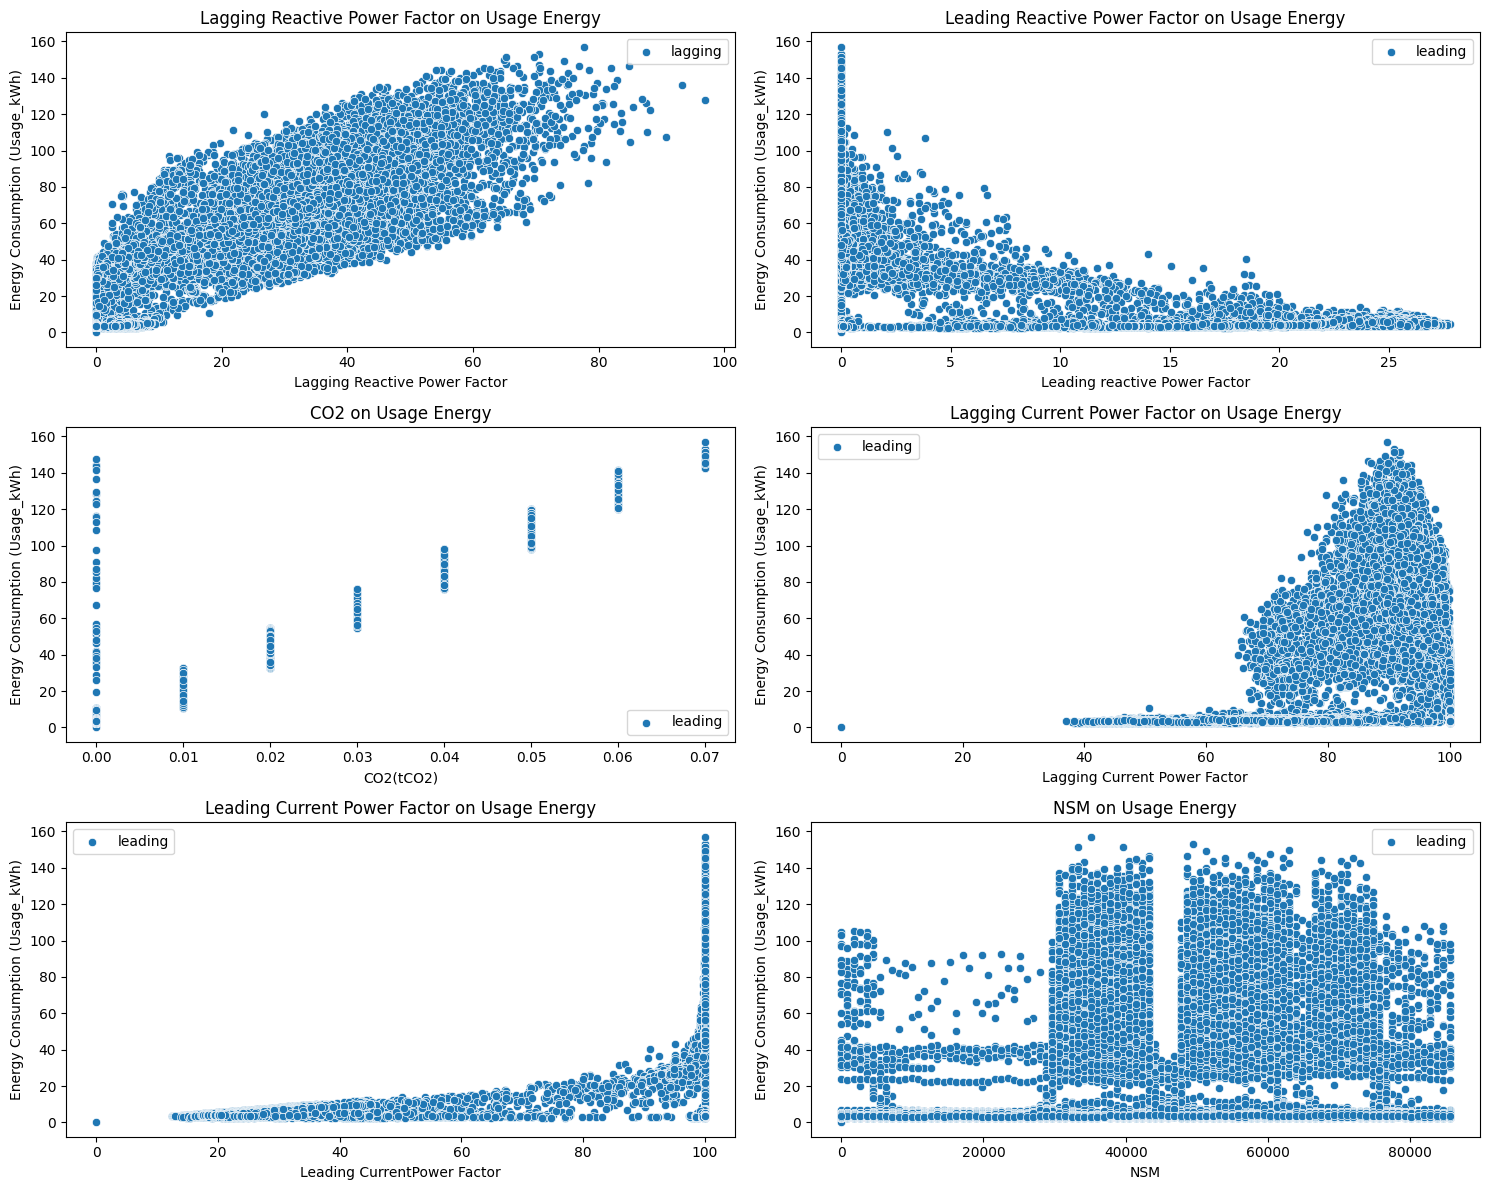

In [23]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.scatterplot(data=data, x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh', label="lagging")
plt.title('Lagging Reactive Power Factor on Usage Energy')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.xlabel('Lagging Reactive Power Factor')
plt.legend()

plt.subplot(3, 2, 2)
sns.scatterplot(data=data, x='Leading_Current_Reactive_Power_kVarh', y='Usage_kWh', label="leading")
plt.title('Leading Reactive Power Factor on Usage Energy')
plt.xlabel('Leading reactive Power Factor')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.legend()

plt.subplot(3, 2, 3)
sns.scatterplot(data=data, x='CO2(tCO2)', y='Usage_kWh', label="leading")
plt.title('CO2 on Usage Energy')
plt.xlabel('CO2(tCO2)')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.legend()

plt.subplot(3, 2, 4)
sns.scatterplot(data=data, x='Lagging_Current_Power_Factor', y='Usage_kWh', label="leading")
plt.title('Lagging Current Power Factor on Usage Energy')
plt.xlabel('Lagging Current Power Factor')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.legend()

plt.subplot(3, 2, 5)
sns.scatterplot(data=data, x='Leading_Current_Power_Factor', y='Usage_kWh', label="leading")
plt.title('Leading Current Power Factor on Usage Energy')
plt.xlabel('Leading CurrentPower Factor')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.legend()

plt.subplot(3, 2,6)
sns.scatterplot(data=data, x='NSM', y='Usage_kWh', label="leading")
plt.title('NSM on Usage Energy')
plt.xlabel('NSM')
plt.ylabel('Energy Consumption (Usage_kWh)')
plt.legend()



plt.tight_layout()
plt.show()

The strongest correlation is between energy consumption and CO² emissions (0.99), confirming that increased energy use leads to higher CO² emissions. The lagging reactive power shows a strong positive correlation (0.9), while the other metrics, including leading reactive power, power factors, and NSM, show weaker correlations with energy consumption. This suggests that while certain power factors have an impact on energy usage, their influence is less significant compared to CO² emissions and lagging reactive power.








Feature Scores: [101575.08027054   2882.47820491   4300.96312346   3486.62283589
   1422.77884449]
P-Values: [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.03270356e-302]


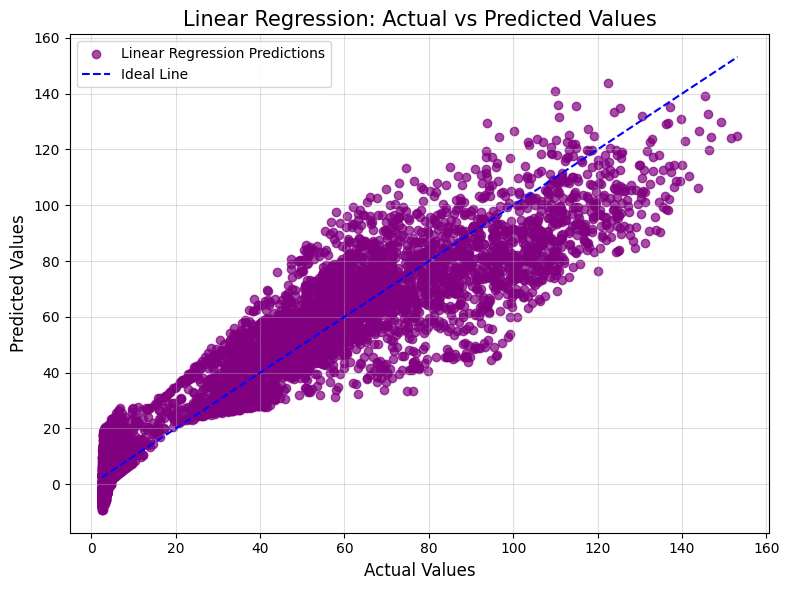

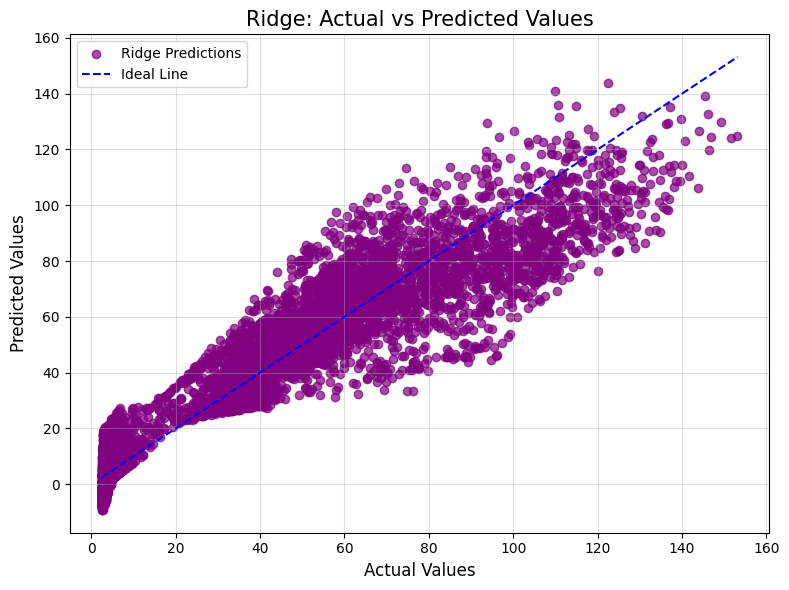

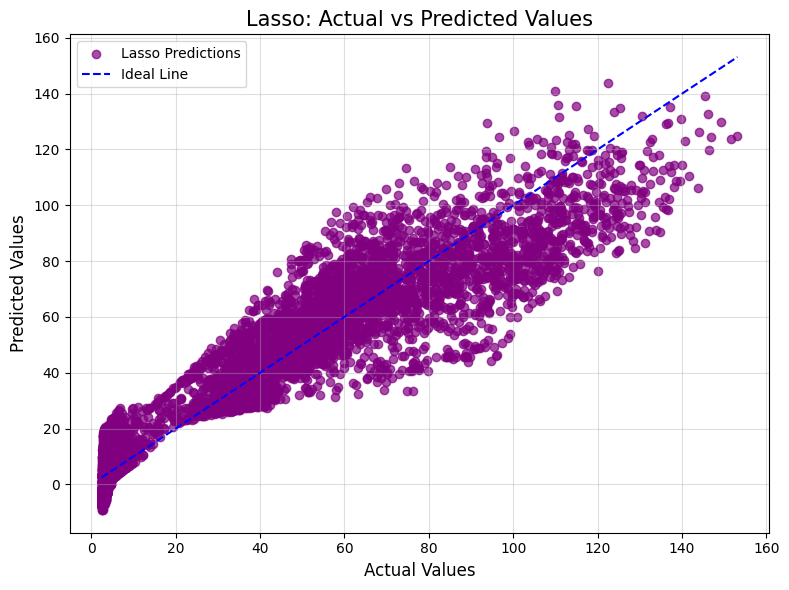

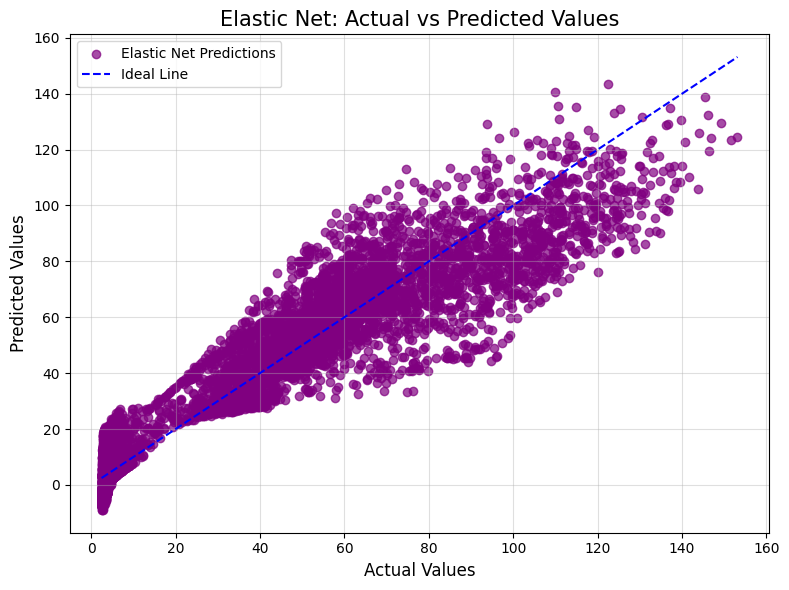

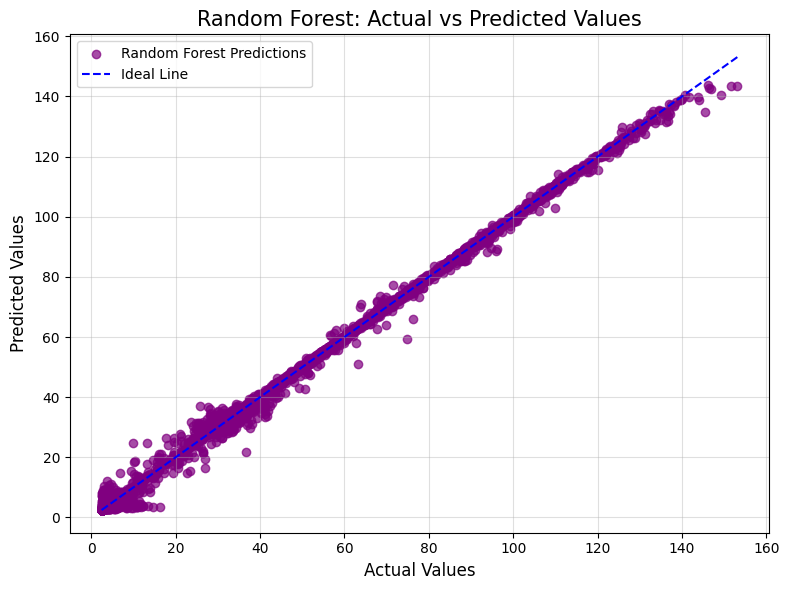

Model: Linear Regression
  MSE: 103.9892
  MAE: 7.1535
  RMSE: 10.1975
  R2: 0.9073
  Adjusted R2: 0.9073

Model: Ridge
  MSE: 103.9890
  MAE: 7.1533
  RMSE: 10.1975
  R2: 0.9073
  Adjusted R2: 0.9073

Model: Lasso
  MSE: 103.9958
  MAE: 7.1487
  RMSE: 10.1978
  R2: 0.9073
  Adjusted R2: 0.9073

Model: Elastic Net
  MSE: 103.9987
  MAE: 7.1270
  RMSE: 10.1980
  R2: 0.9073
  Adjusted R2: 0.9073

Model: Random Forest
  MSE: 1.2054
  MAE: 0.4572
  RMSE: 1.0979
  R2: 0.9989
  Adjusted R2: 0.9989



In [25]:


X = data[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']]
y = data['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


selector = SelectKBest(f_regression, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print("Feature Scores:", selector.scores_)
print("P-Values:", selector.pvalues_)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}


results = {}

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_selected.shape[1] - 1))

    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted R2': adjusted_r2
    }


    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label=f"{model_name} Predictions",color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label="Ideal Line")
    plt.title(f"{model_name}: Actual vs Predicted Values", fontsize=15)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()


for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


While linear models (Linear Regression, Ridge, Lasso, Elastic Net) provide a good baseline with R² values of 0.9073, the Random Forest model vastly outperforms them with an R² of 0.9989, significantly lower MSE, MAE, and RMSE. This result suggests that Random Forest is better suited for predicting energy consumption in the steel industry, likely due to its capacity to capture intricate patterns in the data that linear models cannot.